Практикум по программированию. Задание номер 2.

---

Выполнил: Ключиков Егор ТРПО24-1

**Libs import:**

In [112]:
import matplotlib.pyplot as plt
import itertools

### Обязательная часть

#### Функция визуализации последовательности полигонов, которая представлена в виде итератора. Использована визуализация при помощи библиотеки `matplotlib`

In [113]:
def visualise_polygons(iterable_polygons):
    """
    Visualizes a sequence of flat polygons.

    Args:
    iterable_polygons : iterator
        A sequence of polygons where each polygon is given by a tuple of points.

    Exceptions:
        ValueError:
            - If an empty iterator is passed.
            - If the polygon consists of less than three points.

    Note:

    Plots a graph where each polygon is represented by a closed line.
    The coordinate axes are centered, and the scale is automatically adjusted
    by the size of the furthest points of all polygons.
    """
    polygons = list(iterable_polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    border = []
    for polygon in polygons:
        sorted_by_x = sorted(polygon, key = lambda x: x[0])
        sorted_by_y = sorted(polygon, key = lambda x: x[1])
        border.append(abs(sorted_by_x[0][0]))
        border.append(abs(sorted_by_x[len(polygon) - 1][0]))
        border.append(abs(sorted_by_y[0][1]))
        border.append(abs(sorted_by_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(border), 1 + max(border))
    ax.set_ylim(-1 - max(border), 1 + max(border))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        x_closed = x + [x[0]]
        y_closed = y + [y[0]]
        ax.plot(x_closed, y_closed, linewidth=1, color = 'black')
    plt.show()

### 2 задание. Реализация функций, которые генерирую бесконичную последовательность непересекающихся полигонов с различающимися координатами:

#### 1) Прямоугольники

In [114]:
def gen_rectangle(coords, space):
    """
    Generates an infinite sequence of rectangles shifted horizontally with specified spacing.

    Takes an initial rectangle defined by four coordinates and yields copies of this rectangle
    shifted to the right by increments of (rectangle width + spacing). The rectangles are
    generated indefinitely in a horizontal line.

    Args:
        coords (tuple[tuple[float, float], ...]): A tuple of four (x,y) coordinate pairs
            representing the vertices of the initial rectangle. The order of coordinates
            doesn't matter as they will be sorted internally.
        space (float): The horizontal spacing to maintain between consecutive rectangles.
            Must be a non-negative value.

    Yields:
        tuple[tuple[float, float], ...]: A tuple of four (x,y) coordinate pairs representing
            the vertices of the next rectangle in the sequence. Each yielded rectangle is
            shifted right by (width + space) compared to the previous one.

    Note:
        The function creates an infinite generator. When using it, you should either:
        - Use it in a loop with a break condition
        - Slice it using itertools.islice() as shown in the example
        - Use it with something that consumes finite sequences
    """
    sorted_coords = sorted(coords, key = lambda x: (x[0], x[1]))
    x_side = abs(sorted_coords[0][0] - sorted_coords[3][0])

    positions = itertools.count(start = 0, step=x_side + space)
    for shift in positions:
        yield ((coords[0][0] + shift, coords[0][1]),
            (coords[1][0] + shift, coords[1][1]),
            (coords[2][0] + shift, coords[2][1]),
            (coords[3][0] + shift, coords[3][1])
            )

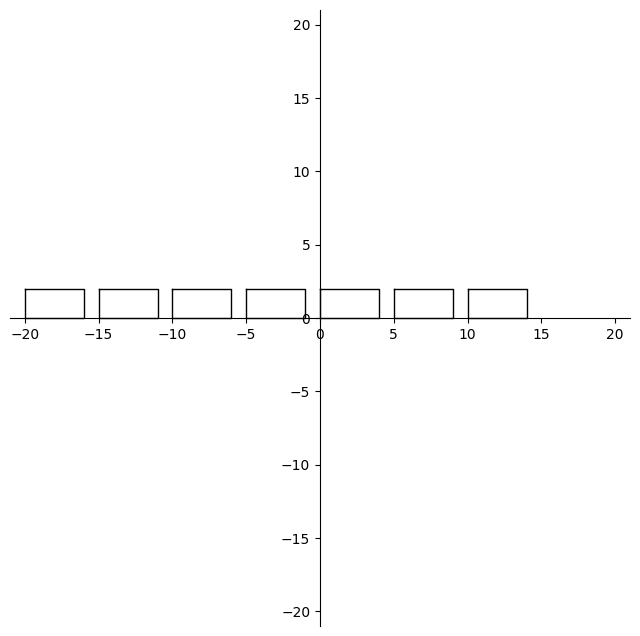

In [153]:
rectangles = itertools.islice(gen_rectangle(((-10, 1), (-8, 1), (-8, 0), (-10, 0)), 0.5), 7)
visualise_polygons(rectangles)

#### 2) Треугольники

In [116]:
def gen_triangle(coords, space):
    """
    Generates an infinite sequence of triangles shifted horizontally with specified spacing.

    Takes an initial triangle defined by three coordinates and yields copies of this triangle
    shifted to the right by increments of (triangle width + spacing). The triangles are
    generated indefinitely in a horizontal line.

    Args:
        coords (tuple[tuple[float, float], ...]): A tuple of three (x,y) coordinate pairs
            representing the vertices of the initial triangle. The order of coordinates
            doesn't matter as they will be sorted internally by x then y coordinates.
        space (float): The horizontal spacing to maintain between consecutive triangles.
            Must be a non-negative value.

    Yields:
        tuple[tuple[float, float], ...]: A tuple of three (x,y) coordinate pairs representing
            the vertices of the next triangle in the sequence. Each yielded triangle is
            shifted right by (width + space) compared to the previous one.

    Note:
        The function creates an infinite generator. When using it, you should either:
        - Use it in a loop with a break condition
        - Slice it using itertools.islice() as shown in the example
        - Use it with something that consumes finite sequences
    """
    srtd = sorted(coords, key = lambda x: (x[0], x[1]))
    x_side = abs(srtd[0][0] - srtd[2][0])
    positions = itertools.count(start = 0, step=x_side + space)
    for shift in positions:
        yield ((coords[0][0] + shift, coords[0][1]),
            (coords[1][0] + shift, coords[1][1]),
            (coords[2][0] + shift, coords[2][1]),
            )

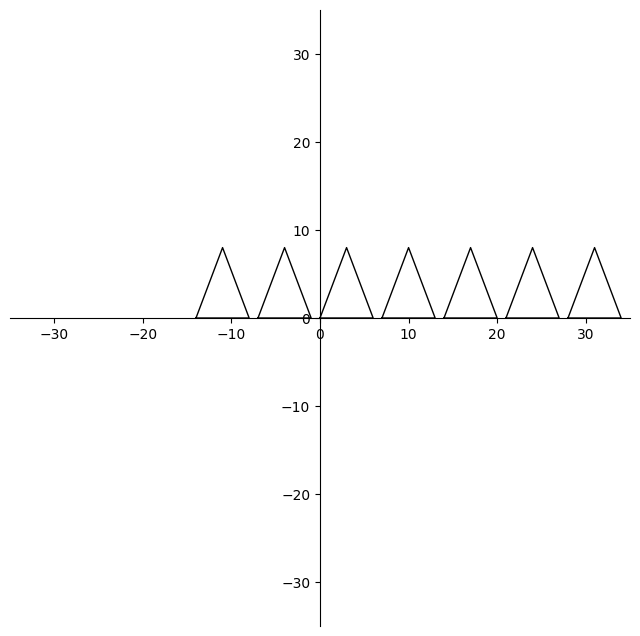

In [157]:
triangles = itertools.islice(gen_triangle(((-7, 0), (-5.5, 4), (-4, 0)), 0.5), 7)
visualise_polygons(triangles)

#### 3) Правильные шестиугольники

In [118]:
def gen_hexagon(coords, space):
    """
    Generates an infinite sequence of hexagons shifted horizontally with specified spacing.

    Takes an initial hexagon defined by six coordinates and yields copies of this hexagon
    shifted to the right by increments of (hexagon width + spacing). The hexagons are
    generated indefinitely in a horizontal line.

    Args:
        coords (tuple[tuple[float, float], ...]): A tuple of six (x,y) coordinate pairs
            representing the vertices of the initial hexagon in either clockwise or
            counter-clockwise order. The order of coordinates doesn't matter for the
            function's operation as they will be sorted internally by x then y coordinates.
        space (float): The horizontal spacing to maintain between consecutive hexagons.
            Must be a non-negative value.

    Yields:
        tuple[tuple[float, float], ...]: A tuple of six (x,y) coordinate pairs representing
            the vertices of the next hexagon in the sequence. Each yielded hexagon is
            shifted right by (width + space) compared to the previous one, maintaining
            the original shape and proportions.

    Note:
        The function creates an infinite generator. Typical usage patterns include:
        - Using itertools.islice() to get a finite number of hexagons
        - Using in a loop with a break condition
        - Consuming with functions that work with finite sequences
    """
    srtd = sorted(coords, key = lambda x: (x[0], x[1]))
    x_side = abs(srtd[0][0] - srtd[5][0])
    positions = itertools.count(start = 0, step=x_side + space)
    for shift in positions:
        yield ((coords[0][0] + shift, coords[0][1]),
            (coords[1][0] + shift, coords[1][1]),
            (coords[2][0] + shift, coords[2][1]),
            (coords[3][0] + shift, coords[3][1]),
            (coords[4][0] + shift, coords[4][1]),
            (coords[5][0] + shift, coords[5][1])
            )

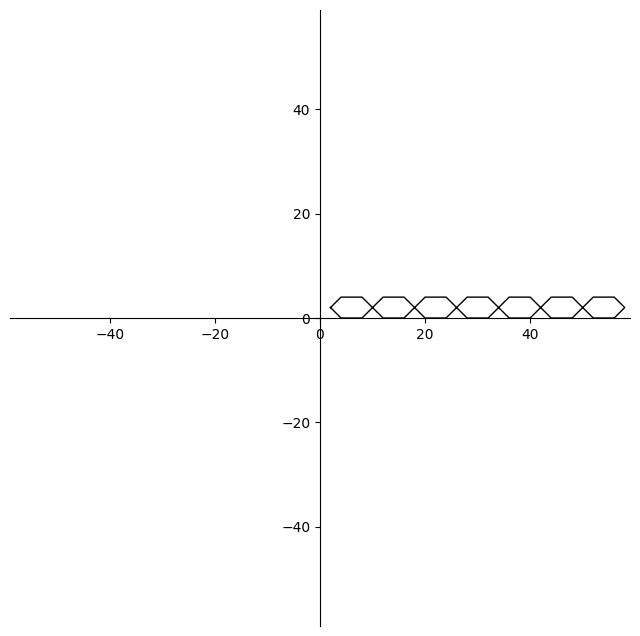

In [167]:
hexagons = itertools.islice(gen_hexagon(((1,1), (2,2), (4,2), (5,1), (4,0), (2,0)), 0), 7)
visualise_polygons(hexagons)

### 3 задание. Реализация операций. В тестировании применяю к последовательности полигонов с помощью функции `map`, как это и требуется в задании:

#### 1) Параллельный перенос

In [120]:
def tr_translate(polygons, space):
    """
    Translates multiple polygons vertically along the OY axis by a specified distance.

    Applies a parallel translation (shift) to each polygon in the input sequence, moving
    them vertically by the specified space value. The translation preserves the original
    shape and horizontal position of each polygon.

    Args:
        polygons (iterable of tuple[tuple[float, float], ...]): An iterable of polygons,
            where each polygon is represented as a tuple of (x, y) coordinate pairs.
        space (float): The vertical distance to translate each polygon. Positive values
            move polygons upward, negative values move them downward.

    Returns:
        map: An iterator of translated polygons, where each polygon maintains its original
            structure but with all y-coordinates offset by the space value.

    Note:
        - The function returns a map object (iterator), so it's evaluated lazily.
        - The original polygons are not modified; new polygon tuples are generated.
        - Works with any polygons (triangles, rectangles, hexagons, etc.) as long as
          they're represented as tuples of coordinate pairs.
    """
    def translate_polygon(polygon):
        """
        Helper function to translate a single polygon's coordinates.
        
        Args:
            polygon (tuple[tuple[float, float], ...]): A polygon as tuple of coordinates.
            
        Returns:
            tuple[tuple[float, float], ...]: Translated polygon with same structure.
        """
        return tuple((x, y + space) for x, y in polygon)

    return map(translate_polygon, polygons)

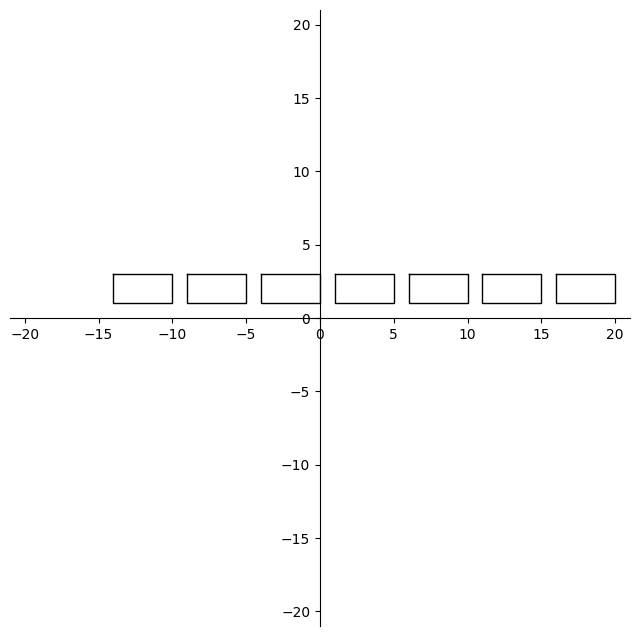

In [169]:
rectangles = itertools.islice(gen_rectangle(((-7, 1), (-5, 1), (-5, 0), (-7, 0)), 0.5), 7)
visualise_polygons(tr_translate(rectangles, 0.5))

#### 2) Поворот

In [122]:
import math

def tr_rotate(polygons, angle_radians):
    """
    Rotates multiple polygons around the origin (0,0) by a specified angle.

    Applies a rotation transformation to each polygon in the input sequence, rotating
    all vertices around the origin (0,0) using standard 2D rotation matrix:
    [ cosθ -sinθ ]
    [ sinθ  cosθ ]

    Args:
        polygons (iterable of tuple[tuple[float, float], ...]): An iterable of polygons,
            where each polygon is represented as a tuple of (x, y) coordinate pairs.
        angle_radians (float): The rotation angle in radians. Positive values rotate
            counter-clockwise, negative values rotate clockwise.

    Returns:
        map: An iterator of rotated polygons, where each polygon maintains its original
            structure but with all vertices transformed by the rotation matrix.

    Note:
        - The function returns a map object (iterator), so evaluation is lazy.
        - Rotation is performed around the origin (0,0).
        - Original polygons are not modified; new polygon tuples are generated.
        - Works with any polygons (triangles, rectangles, hexagons, etc.) as long as
          they're represented as tuples of coordinate pairs.
    """
    cos_a = math.cos(angle_radians)
    sin_a = math.sin(angle_radians)

    def rotate_polygon(polygon):
        """
        Helper function to rotate a single polygon's coordinates.
        
        Args:
            polygon (tuple[tuple[float, float], ...]): A polygon as tuple of coordinates.
            
        Returns:
            tuple[tuple[float, float], ...]: Rotated polygon with same structure.
        """
        return tuple((
            x * cos_a - y * sin_a,
            x * sin_a + y * cos_a
        ) for x, y in polygon)

    return map(rotate_polygon, polygons)

**Тест на возможность поворота на 90 градусов:**

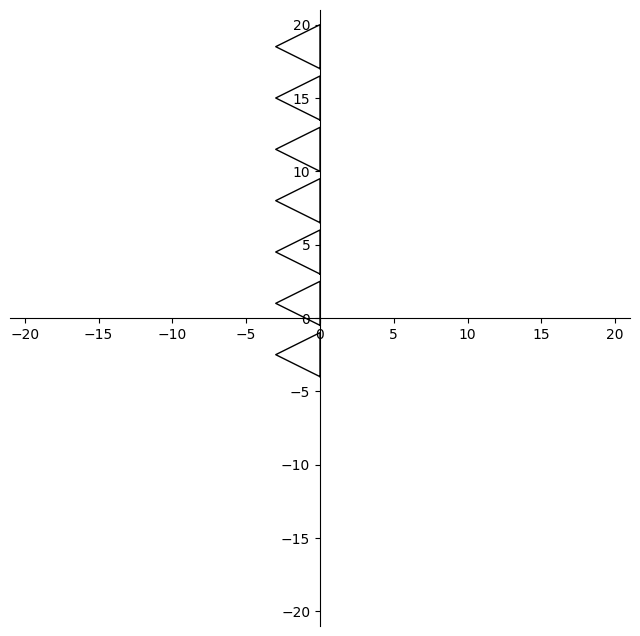

In [123]:
triangles = itertools.islice(gen_triangle(((-4, 0), (-2.5, 3), (-1, 0)), 0.5), 7)
visualise_polygons(tr_rotate(triangles, math.pi / 2))

#### 3) Симметрия

In [124]:
def tr_symmetry(polygons, space):
    """
    Applies horizontal axis symmetry transformation to multiple polygons.

    Reflects polygons across a horizontal axis located at (max_y + 2*space), where max_y
    is the highest y-coordinate found in all polygons. This creates a mirrored version
    of the input polygons above the calculated symmetry axis.

    Args:
        polygons (iterable of tuple[tuple[float, float], ...]): An iterable of polygons,
            where each polygon is represented as a tuple of (x, y) coordinate pairs.
        space (float): Additional offset that determines the position of the symmetry
            axis. The axis will be positioned at (max_y + 2*space), where max_y is the
            maximum y-coordinate in the input polygons.

    Returns:
        map: An iterator of transformed polygons, where each polygon is mirrored across
            the calculated symmetry axis. The original polygon structure is preserved.

    Note:
        - The function first converts the input to a list to find max_y, then returns
          a map object for lazy evaluation of the transformations.
        - The symmetry axis position is calculated as (max_y + 2*space).
        - Original polygons are not modified; new polygon tuples are generated.
        - Works with any polygons (triangles, rectangles, hexagons, etc.).
    """
    polygons = list(polygons)
    max_y = max(coord[1] for polygon in polygons for coord in polygon)

    def symmetry_polygon(polygon):
        """
        Helper function to reflect a single polygon across the symmetry axis.
        
        Args:
            polygon (tuple[tuple[float, float], ...]): A polygon as tuple of coordinates.
            
        Returns:
            tuple[tuple[float, float], ...]: Mirrored polygon with same structure.
        """
        return tuple((x, abs(max_y) - y + 2 * space) for x, y in polygon)

    return map(symmetry_polygon, polygons)

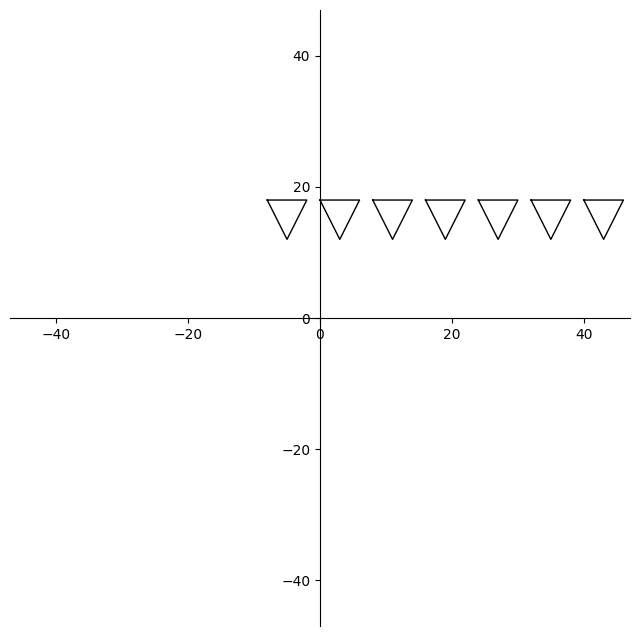

In [171]:
triangles = itertools.islice(gen_triangle(((-4, 0), (-2.5, 3), (-1, 0)), 1), 7)
visualise_polygons(tr_symmetry(triangles, 3))

#### 4) Гомотетия

In [126]:
def tr_homothety(polygons, k, space = None):
    """
    Applies a homothety (uniform scaling transformation) to multiple polygons.

    Scales all polygons uniformly from the origin (0,0) by a specified factor k.
    This transformation preserves the shape of polygons while changing their size.
    Each vertex (x,y) is transformed to (k*x, k*y).

    Args:
        polygons (iterable of tuple[tuple[float, float], ...]): An iterable of polygons,
            where each polygon is represented as a tuple of (x, y) coordinate pairs.
        k (float): The scaling factor:
            - k > 1: Enlargement (scales up)
            - 0 < k < 1: Reduction (scales down)
            - k < 0: Reflection and scaling (changes orientation)
        space (float, optional): This parameter is currently unused in the function
            but maintained for potential future extensions. Defaults to None.

    Returns:
        map: An iterator of scaled polygons, where each polygon maintains its
            original structure but with all coordinates multiplied by k.

    Note:
        - The function returns a map object (iterator), so evaluation is lazy.
        - Scaling is performed relative to the origin (0,0).
        - Original polygons are not modified; new polygon tuples are generated.
        - For k=1, the output will be identical to the input.
        - Negative values of k will produce a reflected and scaled version.
    """
    def scale_polygon(polygon):
        """
        Helper function to scale a single polygon's coordinates.
        
        Args:
            polygon (tuple[tuple[float, float], ...]): A polygon as tuple of coordinates.
            
        Returns:
            tuple[tuple[float, float], ...]: Scaled polygon with same structure.
        """
        return tuple((k * x, k * y) for x, y in polygon)

    return map(scale_polygon, polygons)

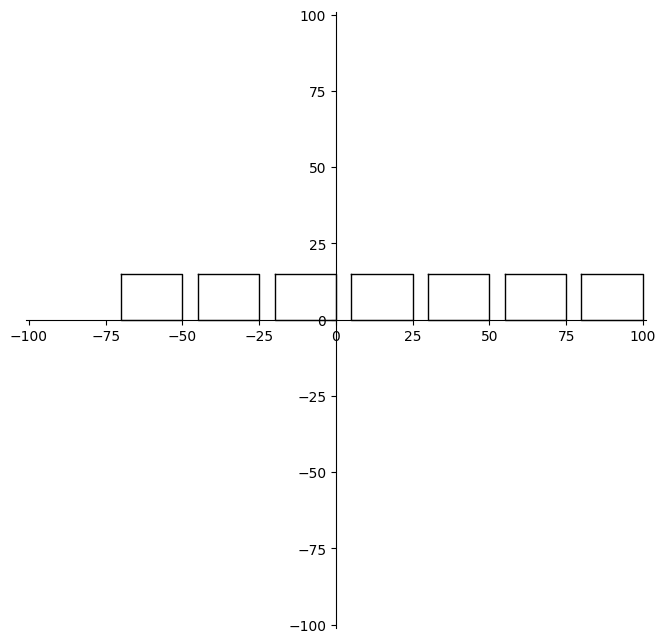

In [172]:
rectangles = itertools.islice(gen_rectangle(((-7, 1.5), (-5, 1.5), (-5, 0), (-7, 0)), 0.5), 7)
visualise_polygons(tr_homothety(rectangles, 5))

### 4 задание. При помощи функций созданных в задании 3 создаю и визуализирую:

#### 1) Три параллельных «ленты» из последовательностей полигонов

In [128]:
def slanted_rectangles():
    """
    Generates three rows of slanted rectangles with different vertical offsets.

    Creates a composition of three layers of rectangles:
    1. A central row at baseline (y=0)
    2. An upper row shifted up by 1.2 units
    3. A lower row shifted down by 1.2 units
    All rectangles are rotated by 60 degrees and spaced horizontally with 0.2 units gap.

    Returns:
        itertools.chain: An iterator that yields all rectangles from the three layers
        in sequence (central, upper, then lower rows).

    Note:
        - Each layer contains 7 rectangles
        - All rectangles are generated from the same base rectangle shape
        - The rotation is applied after translation to create the slanted effect
        - The function combines multiple geometric transformations:
            * Horizontal generation with spacing
            * Vertical translation
            * Rotation
    """
    base = gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.2)
    l1 = tr_rotate(tr_translate(itertools.islice(base, 7), 0), math.radians(60))
    l2 = tr_rotate(tr_translate(itertools.islice(gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.2), 7), 1.2), math.radians(60))
    l3 = tr_rotate(tr_translate(itertools.islice(gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.2), 7), -1.2), math.radians(60))
    return itertools.chain(l1, l2, l3)

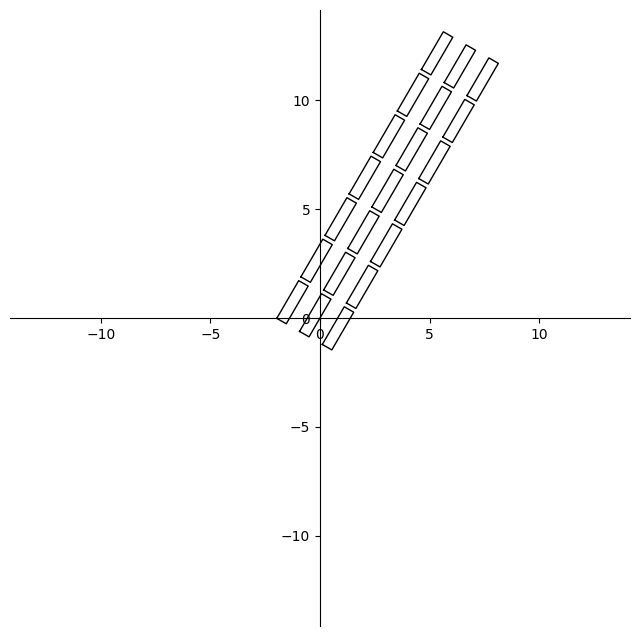

In [129]:
visualise_polygons(slanted_rectangles()) 

#### 2) Две пересекающихся «ленты» из последовательностей полигонов

In [177]:
def crossing_rectangles():
    """Generates two crossing layers of rotated rectangles with vertical offset.

    Creates a composition of two layers of rectangles that appear to cross each other:
    1. Bottom layer: 7 rectangles rotated +45 degrees (counter-clockwise)
    2. Top layer: 7 rectangles rotated -45 degrees (clockwise) and shifted up by 2 units
    All rectangles are horizontally spaced with 0.3 units gap.

    Returns:
        itertools.chain: An iterator that yields all rectangles from both layers
        in sequence (bottom layer first, then top layer).

    Note:
        - Each layer contains 7 rectangles
        - All rectangles are generated from the same base dimensions
        - The top layer is vertically offset before rotation
        - The crossing effect is achieved through opposite rotation angles
        - Rectangles are spaced with 0.3 units horizontal gap
    """
    base1 = gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.3)
    l1 = tr_rotate(itertools.islice(base1, 7), math.radians(60))

    base2 = gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.3)
    shifted = tr_translate(base2, 0)
    l2 = tr_rotate(itertools.islice(shifted, 7), math.radians(-60))

    return itertools.chain(l1, l2)

#### Тест пересечения под углом 60 градусов:

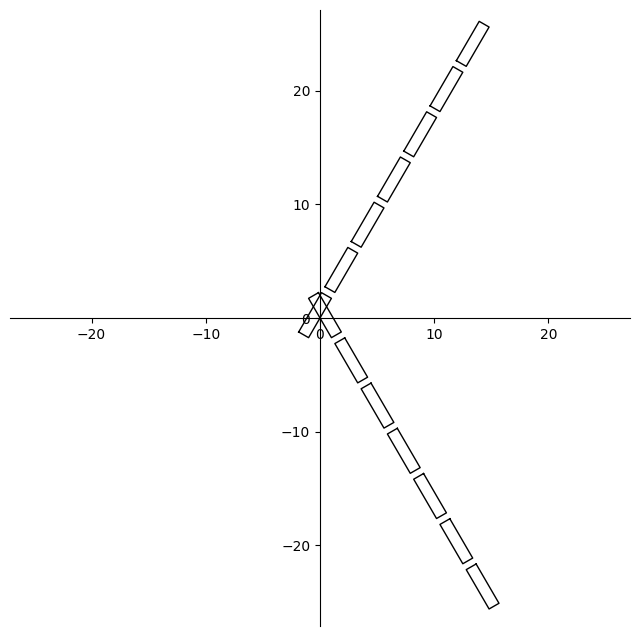

In [178]:
visualise_polygons(crossing_rectangles())

#### 3) Две параллельных ленты треугольников, ориентированных симметрично друг к другу

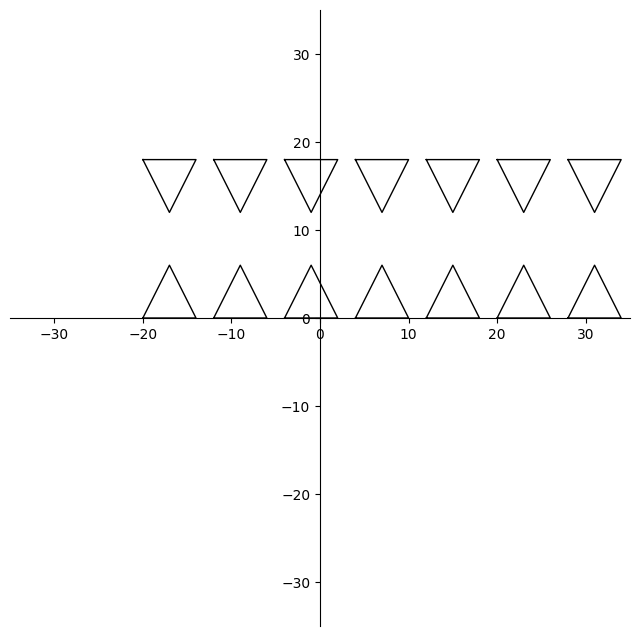

In [181]:
rectangles = itertools.islice(gen_triangle(((-10, 0), (-7, 0), (-8.5, 3)), 1), 7)
list_first = list(rectangles)
list_second = list(tr_symmetry(iter(list_first),3))
final = iter(list_first + list_second)
visualise_polygons(final)

#### 4) Последовательность четырехугольников в разном масштабе

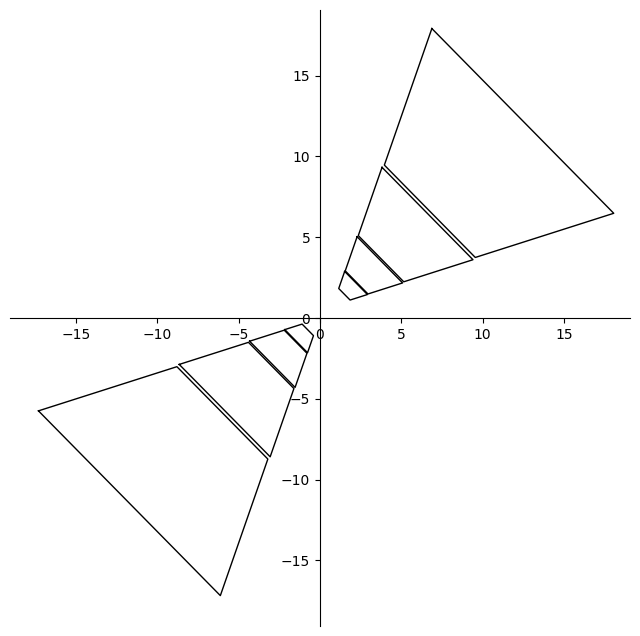

In [184]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])
list_first = list(polygons)
list_second = list(tr_homothety(iter(list_first), 1/2))
list_third = list(tr_homothety(iter(list_second), 1/2))
list_forth = list(tr_homothety(iter(list_third), 1/2))
final = iter(list_first + list_second + list_third + list_forth)
list_final = list(final)
symmetry = tr_symmetry(iter(list_final), 0)
rotated = tr_rotate(iter(list_final + list(symmetry)), 150)
visualise_polygons(rotated)

### 5 задание. Выполнено на 2 балла. Реализую операции:

#### 1) Фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`)

In [134]:
def flt_convex_polygon(polygon):
    """
    Filters convex polygons by checking their vertex winding directions.

    Determines whether a given polygon is convex by examining the cross products
    of consecutive edges. A polygon is convex if all cross products have the same
    sign (either all positive or all negative), indicating consistent winding direction.

    Args:
        polygon (tuple[tuple[float, float], ...]): A polygon represented as a tuple
            of (x,y) coordinate pairs defining its vertices. The polygon should have
            at least 3 vertices to be considered valid.

    Returns:
        tuple[tuple[float, float], ...] or None: The original polygon if it is convex,
            None if it is concave, degenerate, or has fewer than 3 vertices.

    Note:
        - All triangles (3-vertex polygons) are considered convex by definition
        - The function handles both clockwise and counter-clockwise winding
        - Collinear vertices (cross product = 0) are skipped in the convexity check
        - The check is performed in O(n) time where n is the number of vertices

    """
    if len(polygon) < 3:
        return None
    
    def cross_product(a, b, c):
        """
        Calculates the 2D cross product of vectors AB and AC.
        
        Args:
            a (tuple[float, float]): First point
            b (tuple[float, float]): Second point
            c (tuple[float, float]): Third point
            
        Returns:
            float: The z-component of the 3D cross product (AB × AC)
        """
        return (b[0]-a[0])*(c[1]-a[1]) - (b[1]-a[1])*(c[0]-a[0])
    
    n = len(polygon)
    if n == 3:
        return polygon
    
    sign = 0
    for i in range(n):
        a, b, c = polygon[i], polygon[(i+1)%n], polygon[(i+2)%n]
        cp = cross_product(a, b, c)
        if cp != 0:
            if sign == 0:
                sign = 1 if cp > 0 else -1
            else:
                if (cp > 0 and sign < 0) or (cp < 0 and sign > 0):
                    return None
    
    return polygon

#### 2) Фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`)

In [135]:
def flt_angle_point(polygon, point):
    """
    Filters polygons based on whether they contain a specified vertex point.

    Checks if the given polygon contains the exact specified point as one of its vertices.
    This is useful for selecting polygons that have a particular corner or angle point.

    Args:
        polygon (tuple[tuple[float, float], ...]): A polygon represented as a tuple
            of (x,y) coordinate pairs defining its vertices.
        point (tuple[float, float]): The (x,y) coordinates of the vertex point to check for.

    Returns:
        tuple[tuple[float, float], ...] or None: The original polygon if it contains
            the specified point as a vertex, None otherwise.

    Note:
        - The check is performed using exact coordinate matching
        - Floating-point precision may affect matching in some cases
        - The function only checks vertex points, not points along edges
        - For tolerance-based matching, the input points should be pre-processed
    """
    if point in polygon:
        return polygon

#### 3) Фильтрации фигур, имеющих площадь меньше заданной (`flt_square`)

In [136]:
def flt_square(polygon, max_square):
    """
    Filters polygons based on their calculated area.

    Returns the polygon only if its area is less than the specified maximum value.
    Uses the shoelace formula to calculate the polygon's area.

    Args:
        polygon (tuple[tuple[float, float], ...]): A polygon represented as a tuple
            of (x,y) coordinate pairs defining its vertices. Must have at least 3 vertices.
        max_square (float): The maximum area threshold. Polygons with area less than
            this value will be returned, others will be filtered out.

    Returns:
        tuple[tuple[float, float], ...] or None: The original polygon if its area is
            less than max_square, None otherwise.

    Raises:
        ValueError: If the polygon has fewer than 3 vertices (cannot form a valid area).

    Note:
        - Uses the shoelace formula (Gauss's area formula) for calculation
        - Works with both convex and concave polygons
        - The polygon vertices should be ordered either clockwise or counter-clockwise
        - For self-intersecting polygons, the result may not be meaningful
    """
    def calculate_area(poly):
        """
        Calculates the area of a polygon using the shoelace formula.
        
        Args:
            poly (tuple[tuple[float, float], ...]): Polygon vertices
            
        Returns:
            float: Calculated area
            
        Raises:
            ValueError: If poly has fewer than 3 vertices
        """
        n = len(poly)
        area = 0.0
        for i in range(n):
            j = (i + 1) % n
            area += poly[i][0] * poly[j][1]
            area -= poly[j][0] * poly[i][1]
        return abs(area) / 2.0
    
    area = calculate_area(polygon)
    if area < max_square:
        return polygon

#### 4) Фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`)

In [137]:
def flt_short_side(polygon, side):
    """Filters polygons based on the length of their shortest side.

    Returns the polygon only if its shortest side is less than the specified threshold value.
    Calculates the Euclidean distance between consecutive vertices to determine side lengths.

    Args:
        polygon (tuple[tuple[float, float], ...]): A polygon represented as a tuple
            of (x,y) coordinate pairs defining its vertices. Must have at least 2 vertices.
        side (float): The maximum length threshold for the shortest side. Polygons with
            any side shorter than this value will be returned, others will be filtered out.

    Returns:
        tuple[tuple[float, float], ...] or None: The original polygon if its shortest
            side is less than the threshold, None otherwise.

    Raises:
        ValueError: If the polygon has fewer than 2 vertices (cannot form any sides).

    Note:
        - Uses Euclidean distance for side length calculation
        - Works with both convex and concave polygons
        - The polygon vertices should be ordered either clockwise or counter-clockwise
        - For degenerate polygons (collinear points), may return very small side lengths
    """
    def calculate_side_length(a, b):
        """
        Calculates the Euclidean distance between two points.
        
        Args:
            a (tuple[float, float]): First vertex coordinates
            b (tuple[float, float]): Second vertex coordinates
            
        Returns:
            float: Distance between the points
        """
        return ((b[0]-a[0])**2 + (b[1]-a[1])**2)**0.5
    
    min_side = float('inf')
    n = len(polygon)
    for i in range(n):
        j = (i + 1) % n
        length = calculate_side_length(polygon[i], polygon[j])
        if length < min_side:
            min_side = length
    
    if min_side < side:
        return polygon

#### 5) Фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`)

In [138]:
def flt_point_inside(polygon, point):
    """
    Filters convex polygons that contain a specified point inside their boundaries.

    Returns the convex polygon only if it contains the given point. Uses cross-product
    checking to determine if the point lies on the same side of all polygon edges.

    Args:
        polygon (tuple[tuple[float, float], ...]): A convex polygon represented as
            a tuple of (x,y) coordinate pairs defining its vertices. Must be convex
            and have at least 3 vertices.
        point (tuple[float, float]): The (x,y) coordinates of the point to check.

    Returns:
        tuple[tuple[float, float], ...] or None: The original convex polygon if it
            contains the point, None otherwise.

    Raises:
        ValueError: If the input polygon is not convex (as determined by flt_convex_polygon)

    Note:
        - Only works with convex polygons (uses flt_convex_polygon to verify)
        - Uses cross-product method for point-in-polygon test
        - Edge cases: Points exactly on edges may return inconsistent results
        - For concave polygons, consider using ray-casting algorithm instead
    """
    def point_in_convex_poly(poly, pt):
        """
        Determines if a point is inside a convex polygon using cross-product method.
        
        Args:
            poly (tuple[tuple[float, float], ...]): Convex polygon vertices
            pt (tuple[float, float]): Point coordinates
            
        Returns:
            bool: True if point is inside polygon, False otherwise
            
        Note:
            - Assumes polygon is convex (undefined behavior for concave polygons)
            - Points exactly on edges may return True or False
        """
        n = len(poly)
        if n < 3:
            return False
        
        for i in range(n):
            a, b = poly[i], poly[(i+1)%n]
            cross = (b[0]-a[0])*(pt[1]-a[1]) - (b[1]-a[1])*(pt[0]-a[0])
            if cross < 0:
                return False
        return True
    
    if flt_convex_polygon(polygon) and point_in_convex_poly(polygon, point):
        return polygon


#### 6) Фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

In [139]:
def flt_polygon_angles_inside(polygon, target_polygon):
    """
    Filters convex polygons that contain any vertex of a target polygon.

    Returns the convex test polygon if it contains at least one vertex of the target
    polygon. This is useful for spatial relationship checks between polygons.

    Args:
        polygon (tuple[tuple[float, float], ...]): A convex polygon to test, represented
            as a tuple of (x,y) coordinate pairs. Must be convex and have ≥3 vertices.
        target_polygon (tuple[tuple[float, float], ...]): The polygon whose vertices
            will be checked for containment. Must have ≥1 vertex.

    Returns:
        tuple[tuple[float, float], ...] or None: The original test polygon if it
            contains any vertex of the target polygon, None otherwise.

    Raises:
        ValueError: If the input polygon is not convex (as verified by flt_convex_polygon)
        ValueError: If the target polygon has no vertices

    Note:
        - Only works with convex test polygons (uses flt_convex_polygon to verify)
        - Uses flt_point_inside for point containment checks
        - Returns at first found contained vertex (doesn't check all vertices)
        - For concave polygons, consider alternative approaches
    """
    if not flt_convex_polygon(polygon):
        return None
    
    for point in target_polygon:
        if flt_point_inside(polygon, point):
            return polygon

---

### Тестирование написанных функций:

#### 1)

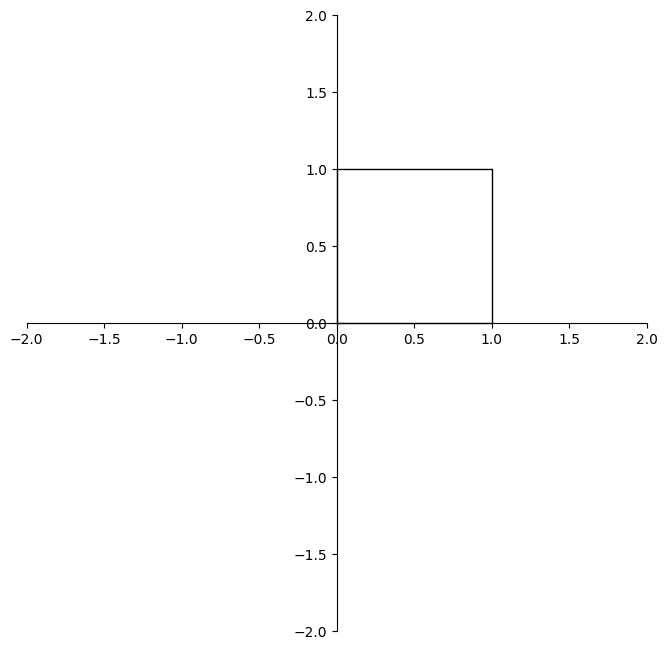

In [140]:
iterator = iter([((0, 0), (1, 0), (1, 1), (0, 1)), ((1, 1), (1, 2), (2, 2), (2, 1))])
filtered = filter(lambda pol: flt_angle_point(pol, (1, 0)), iterator)
visualise_polygons(filtered)

#### 2)

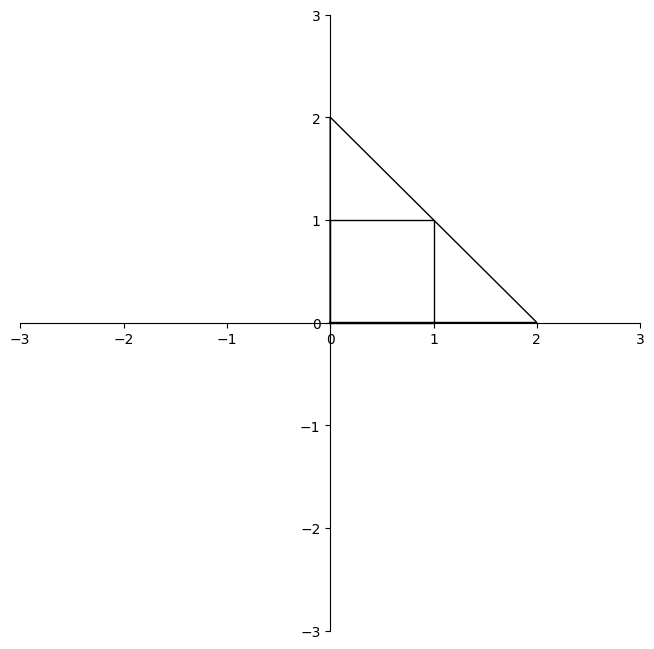

In [141]:
iterator = iter([((0, 0), (1, 0), (1, 1), (0, 1)), ((0, 0), (2, 0), (1, 1), (0, 2))])
filtered = filter(flt_convex_polygon, iterator)
visualise_polygons(filtered)

#### 3)

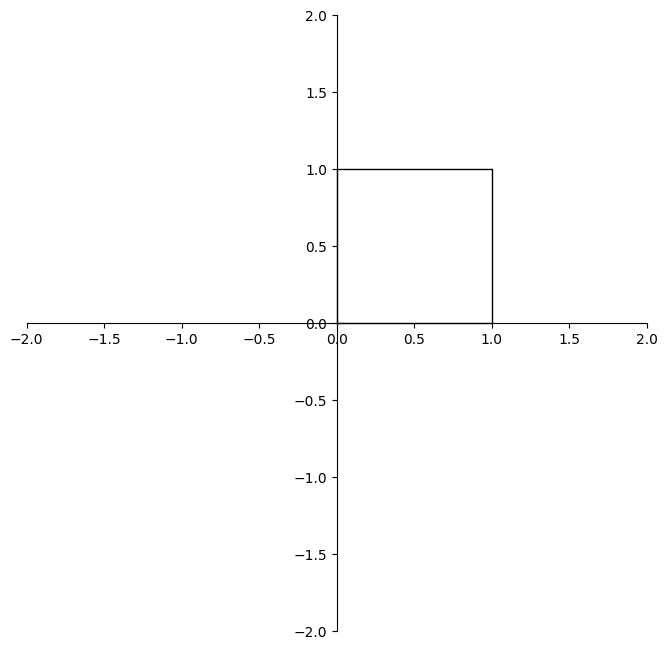

In [142]:
iterator = iter([((0, 0), (1, 0), (1, 1), (0, 1)), ((0, 0), (2, 0), (2, 2), (0, 2))])
filtered = filter(lambda pol: flt_square(pol, 1.5), iterator)
visualise_polygons(filtered)

#### 4)

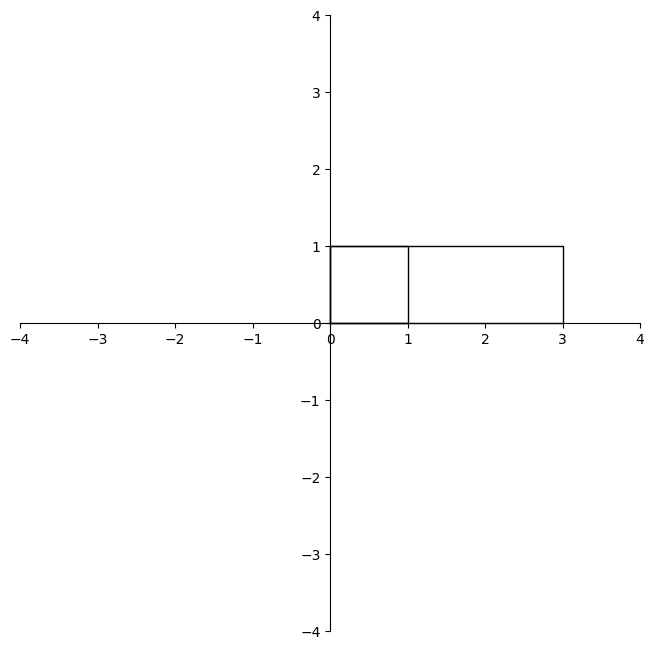

In [143]:
iterator = iter([((0, 0), (1, 0), (1, 1), (0, 1)), ((0, 0), (3, 0), (3, 1), (0, 1))])
filtered = filter(lambda pol: flt_short_side(pol, 1.5), iterator)
visualise_polygons(filtered)

#### 5)

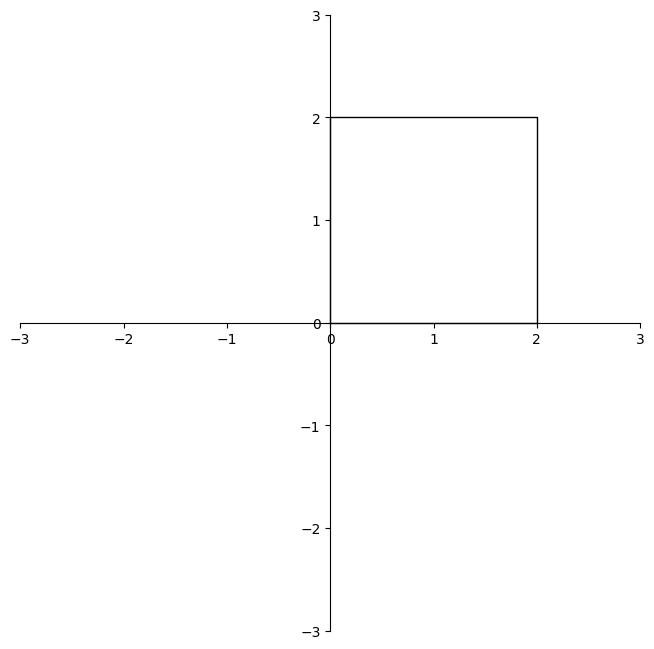

In [144]:
iterator = iter([((0, 0), (2, 0), (2, 2), (0, 2)), ((1, 1), (1, 3), (3, 3), (3, 1))])
filtered = filter(lambda pol: flt_point_inside(pol, (1, 1)), iterator)
visualise_polygons(filtered)

#### 6)

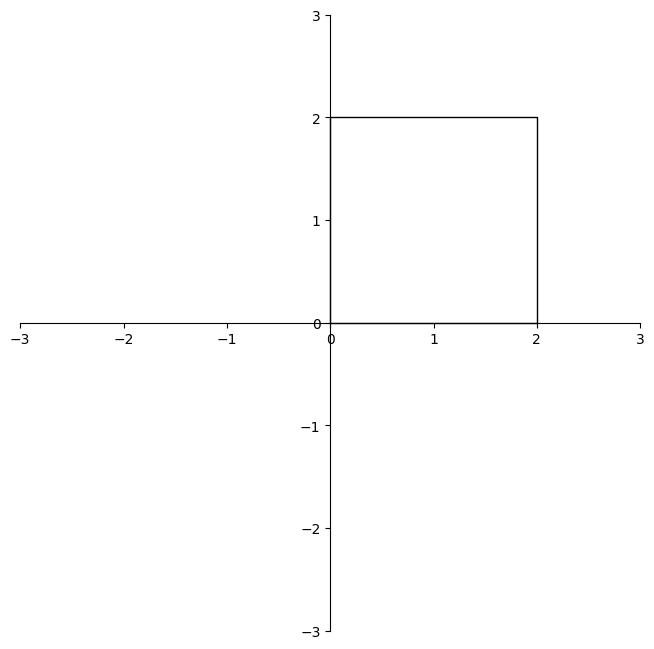

In [145]:
iterator = iter([((0, 0), (2, 0), (2, 2), (0, 2)), ((1, 1), (1, 3), (3, 3), (3, 1))])
target = ((1, 1), (1, 2), (2, 2), (2, 1))
filtered = filter(lambda pol: flt_polygon_angles_inside(pol, target), iterator)
visualise_polygons(filtered)

### 6.	С помощью данных функций реализовать и визуализировать:

#### * фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено шесть фигур;

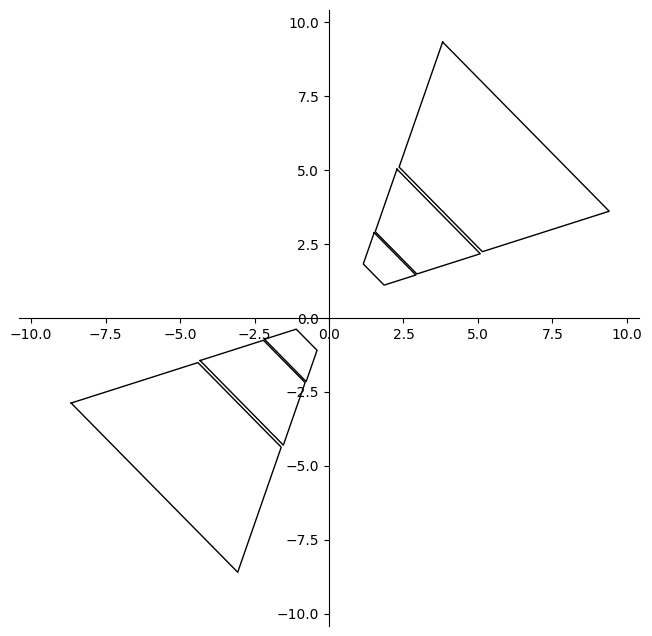

In [188]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])
list_first = list(polygons)
list_second = list(tr_homothety(iter(list_first), 1/2))
list_third = list(tr_homothety(iter(list_second), 1/2))
list_forth = list(tr_homothety(iter(list_third), 1/2))
final = iter(list_first + list_second + list_third + list_forth)
list_final = list(final)
symmetry = tr_symmetry(iter(list_final), 0)
rotated = tr_rotate(iter(list_final + list(symmetry)), 150)
filtered = filter(lambda pol: flt_short_side(pol, 3.5), rotated)
visualise_polygons(filtered)

### 7. Реализовать декораторы и продемонстрировать корректность их работы:

In [147]:
import functools

def dec_tr_translate(space_param):
    """
    Decorator that applies vertical translation to polygon sequences before processing.

    This decorator factory creates a decorator that transforms the first argument
    (expected to be a polygon sequence) by applying a vertical translation before
    passing it to the decorated function. The translation uses tr_translate with
    the specified space parameter.

    Args:
        space_param (float): The vertical offset to apply to the polygon sequence.
            Positive values move polygons upward, negative values move them downward.

    Returns:
        function: A decorator that will apply the translation transformation to
            the first argument of the decorated function.

    Note:
        - Only affects the first positional argument (assumed to be polygon sequence)
        - Preserves the original function's name and docstring using functools.wraps
        - The decorated function should expect a polygon sequence as its first argument
    """

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args):
            new_args = list(args)
            new_args[0] =  tr_translate(new_args[0], space = space_param)
            result = func(*new_args)
            return result
        return wrapper
    return decorator


def dec_tr_rotate(angle):
    """
    Decorator factory that applies rotation to polygon sequences before processing.

    Creates a decorator that transforms the first argument (expected to be a polygon sequence)
    by applying a rotation transformation before passing it to the decorated function.
    The rotation uses tr_rotate with the specified angle parameter.

    Args:
        angle (float): The rotation angle in radians. Positive values rotate counter-clockwise,
            negative values rotate clockwise. For degrees, use math.radians(degrees).

    Returns:
        function: A decorator that will apply the rotation transformation to the first
            argument of the decorated function.

    Note:
        - Only affects the first positional argument (assumed to be polygon sequence)
        - Preserves the original function's name and docstring using functools.wraps
        - Rotation is performed around the origin (0,0)
        - The decorated function should expect a polygon sequence as its first argument
    """

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args):
            new_args = list(args)
            new_args[0] =  tr_rotate(new_args[0], angle_radians = angle)
            result = func(*new_args)
            return result
        return wrapper
    return decorator


def dec_tr_symmetry(space_param):
    """
    Decorator factory that applies vertical symmetry transformation to polygon sequences.

    Creates a decorator that transforms the first argument (expected to be a polygon sequence)
    by reflecting it across a horizontal symmetry axis before passing it to the decorated
    function. The symmetry axis is positioned at (max_y + 2*space_param), where max_y is
    the maximum y-coordinate in the input polygons.

    Args:
        space_param (float): The additional offset that determines the position of the
            symmetry axis. The axis will be at (max_y + 2*space_param), where max_y is
            the highest y-coordinate in the input sequence.

    Returns:
        function: A decorator that will apply the symmetry transformation to the first
            argument of the decorated function.

    Note:
        - Only affects the first positional argument (assumed to be polygon sequence)
        - Preserves the original function's name and docstring using functools.wraps
        - The symmetry transformation creates mirrored copies above the calculated axis
        - The decorated function should expect a polygon sequence as its first argument
    """

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args):
            new_args = list(args)
            new_args[0] =  tr_symmetry(new_args[0], space = space_param)
            result = func(*new_args)
            return result
        return wrapper
    return decorator


def dec_tr_homothety(k, space_param):
    """
    Decorator factory that applies uniform scaling (homothety) to polygon sequences.

    Creates a decorator that transforms the first argument (expected to be a polygon sequence)
    by applying uniform scaling from the origin before passing it to the decorated function.
    The scaling uses tr_homothety with the specified k and space parameters.

    Args:
        k (float): The scaling factor:
            - k > 1: Enlargement (scales up)
            - 0 < k < 1: Reduction (scales down)
            - k < 0: Reflection and scaling
        space_param (float, optional): Currently unused parameter maintained for future
            extensions. Defaults to None.

    Returns:
        function: A decorator that will apply the scaling transformation to the first
            argument of the decorated function.

    Note:
        - Only affects the first positional argument (assumed to be polygon sequence)
        - Preserves the original function's name and docstring using functools.wraps
        - Scaling is performed relative to the origin (0,0)
        - The decorated function should expect a polygon sequence as its first argument
        - Negative k values will produce reflected and scaled versions
    """

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args):
            new_args = list(args)
            new_args[0] =  tr_homothety(new_args[0], k = k, space = space_param)
            result = func(*new_args)
            return result
        return wrapper
    return decorator

---

#### Тестирование. Декораторы преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: @tr_translate, @tr_rotate, @tr_symmetry, @tr_homothety.

##### 1) @tr_translate

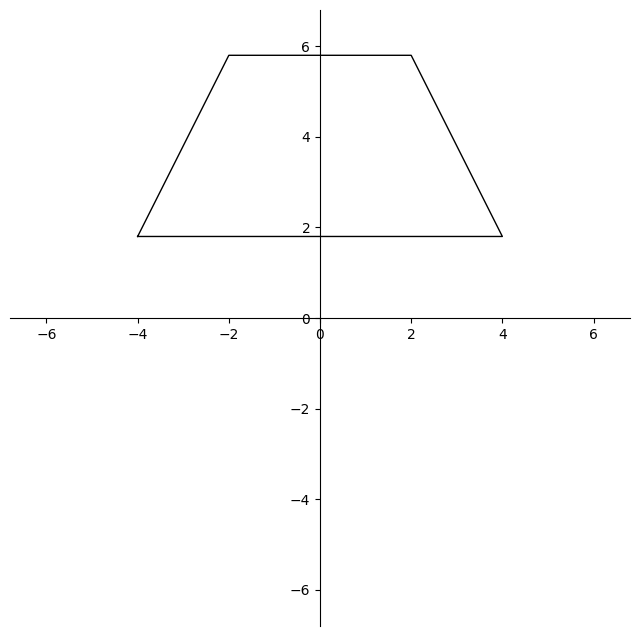

In [148]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])

@dec_tr_translate(10)
def visualise_polygons(iterable_polygons):
    polygons = list(iterable_polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    border = []
    for polygon in polygons:
        sorted_by_x = sorted(polygon, key = lambda x: x[0])
        sorted_by_y = sorted(polygon, key = lambda x: x[1])
        border.append(abs(sorted_by_x[0][0]))
        border.append(abs(sorted_by_x[len(polygon) - 1][0]))
        border.append(abs(sorted_by_y[0][1]))
        border.append(abs(sorted_by_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(border), 1 + max(border))
    ax.set_ylim(-1 - max(border), 1 + max(border))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        x_closed = x + [x[0]]
        y_closed = y + [y[0]]
        ax.plot(x_closed, y_closed, linewidth=1, color = 'black')
    plt.show()

visualise_polygons(polygons)

##### 2) @tr_rotate

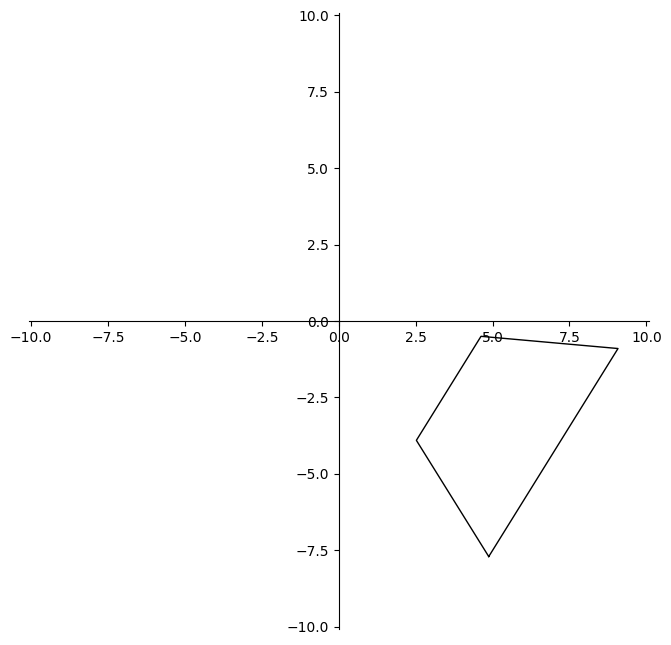

In [149]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])

@dec_tr_rotate(45)
def visualise_polygons(iterable_polygons):
    polygons = list(iterable_polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    border = []
    for polygon in polygons:
        sorted_by_x = sorted(polygon, key = lambda x: x[0])
        sorted_by_y = sorted(polygon, key = lambda x: x[1])
        border.append(abs(sorted_by_x[0][0]))
        border.append(abs(sorted_by_x[len(polygon) - 1][0]))
        border.append(abs(sorted_by_y[0][1]))
        border.append(abs(sorted_by_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(border), 1 + max(border))
    ax.set_ylim(-1 - max(border), 1 + max(border))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        x_closed = x + [x[0]]
        y_closed = y + [y[0]]
        ax.plot(x_closed, y_closed, linewidth=1, color = 'black')
    plt.show()

visualise_polygons(polygons)

##### 3) @tr_symmetry

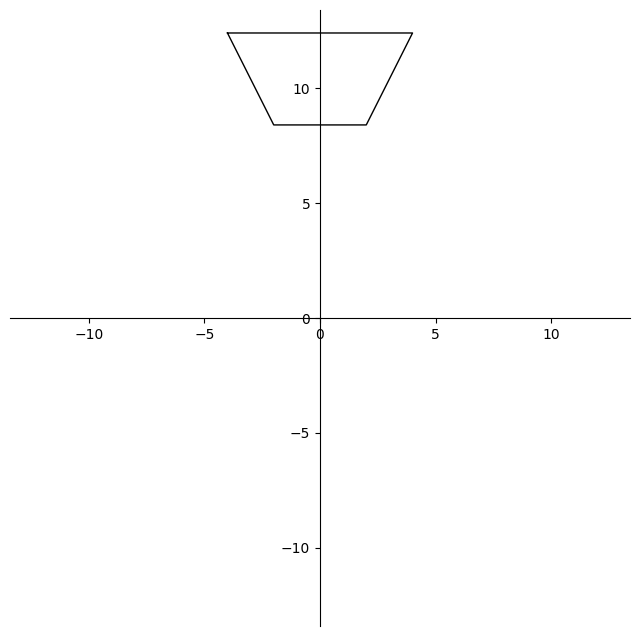

In [150]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])

@dec_tr_symmetry(0)
def visualise_polygons(iterable_polygons):
    polygons = list(iterable_polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    border = []
    for polygon in polygons:
        sorted_by_x = sorted(polygon, key = lambda x: x[0])
        sorted_by_y = sorted(polygon, key = lambda x: x[1])
        border.append(abs(sorted_by_x[0][0]))
        border.append(abs(sorted_by_x[len(polygon) - 1][0]))
        border.append(abs(sorted_by_y[0][1]))
        border.append(abs(sorted_by_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(border), 1 + max(border))
    ax.set_ylim(-1 - max(border), 1 + max(border))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        x_closed = x + [x[0]]
        y_closed = y + [y[0]]
        ax.plot(x_closed, y_closed, linewidth=1, color = 'black')
    plt.show()

visualise_polygons(polygons)

##### 4) @tr_homothety

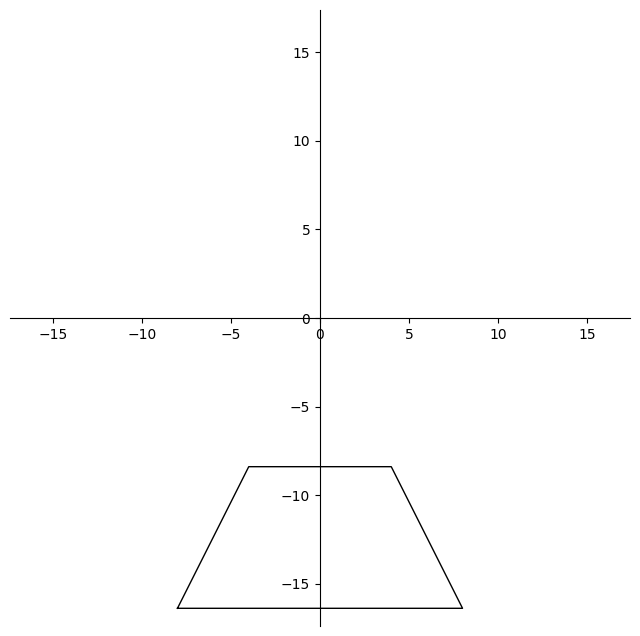

In [151]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])

@dec_tr_homothety(2, 0)
def visualise_polygons(iterable_polygons):
    polygons = list(iterable_polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    border = []
    for polygon in polygons:
        sorted_by_x = sorted(polygon, key = lambda x: x[0])
        sorted_by_y = sorted(polygon, key = lambda x: x[1])
        border.append(abs(sorted_by_x[0][0]))
        border.append(abs(sorted_by_x[len(polygon) - 1][0]))
        border.append(abs(sorted_by_y[0][1]))
        border.append(abs(sorted_by_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(border), 1 + max(border))
    ax.set_ylim(-1 - max(border), 1 + max(border))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        x_closed = x + [x[0]]
        y_closed = y + [y[0]]
        ax.plot(x_closed, y_closed, linewidth=1, color = 'black')
    plt.show()

visualise_polygons(polygons)